In [2]:
## Construção do Corpus

In [3]:
import nltk # carga do pacote Natural Language Toolkit

In [4]:
from nltk.corpus import PlaintextCorpusReader

In [5]:
corpus_root = r"F:\_Pesquisa\PosDoc\Corpora"
corpus_root

'F:\\_Pesquisa\\PosDoc\\Corpora'

In [6]:
corpora = PlaintextCorpusReader(corpus_root, '.*', encoding='latin_1')
corpora

<PlaintextCorpusReader in 'F:\\_Pesquisa\\PosDoc\\Corpora'>

In [7]:
corpora.fileids()

['Discursos_2003.txt',
 'Discursos_2004.txt',
 'Discursos_2005.txt',
 'Discursos_2006.txt',
 'Discursos_2007.txt',
 'Discursos_2008.txt',
 'Discursos_2009.txt',
 'Discursos_2010.txt',
 'Discursos_2011.txt',
 'Discursos_2012.txt',
 'Discursos_2013.txt',
 'Discursos_2014.txt',
 'Discursos_2015.txt',
 'Discursos_2016.txt',
 'Discursos_2017.txt']

In [33]:
# corpora.open('Discursos_2017.txt')

In [9]:
# http://www.nltk.org/howto/corpus.html#plaintext-corpora
len(corpora.words())

182039023

In [11]:
palavras = corpora.words()
palavras[-2]

'DETAQ'

In [12]:
palavras[0:10]

['O', 'SR', '.', 'PRESIDENTE', '(', 'Nilton', 'Capixaba', ')', '-', 'Está']

In [13]:
frases = corpora.sents()
frases

[['O', 'SR', '.', 'PRESIDENTE', '(', 'Nilton', 'Capixaba', ')', '-', 'Está', 'reaberta', 'a', 'sessão', '.'], ['Como', 'ficou', 'decidido', 'na', 'essão', 'do', 'dia', '18', ',', 'esta', 'sessão', 'seria', 'realizada', 'hoje', ',', 'dia', '22', ',', 'às', '11', 'horas', '.'], ...]

In [ ]:
# http://nltk.sourceforge.net/doc/pt-br/tokenize.html
# http://www.nltk.org/api/nltk.tokenize.html

In [14]:
raw = corpora.raw()

In [15]:
raw[0:1000]

"O SR. PRESIDENTE  (Nilton Capixaba) - Está reaberta a sessão. Como  ficou decidido na essão do dia 18, esta sessão seria realizada hoje, dia 22, às 11 horas. Sobre a mesa, expediente que será lido pelo sr. Primeiro secretário em exercício, Senador Romeu Tuma.\r\nO SR. PRESIDENTE  (Nilton Capixaba) - Tendo em vista que a Comissão Mista de Planos, Orçamentos Públicos e Fiscalização continua a apreciação dos pareceres sobre os Projetos de Lei n 30, de 2003-CN, que 'Dispõe sobre o Plano Plurianual para o período de 2004/2007' e 31, de 2003-CN, que 'Estima a Receita e fixa a Despesa da União para o exercício financeiro de 2004', a Presidência suspende esta sessão para reabri-la, amanhã, às 15 horas. Está suspensa a presente sessão.\r\nO SR. PRESIDENTE  (Inocêncio Oliveira) - Declaro reaberta a sessão, suspensa quando havia  quorum  regimental de 61 Srs. Senadores e 366 Srs. Deputados.  Foi feito acordo com todas as lideranças, desde que a sessão foi suspensa, através de amplo entendimento,

In [16]:
len(raw)

956988201

In [17]:
# http://www.nltk.org/api/nltk.tokenize.html
from nltk.tokenize import regexp_tokenize

In [18]:
# pattern = r'\w+|[^\w\s]+'
# pattern='\w+|\$[\d\.]+|\S+'
tokens = regexp_tokenize(raw, pattern = r'\w+|[^\w\s]+')

In [19]:
tokens[0:10]

['O', 'SR', '.', 'PRESIDENTE', '(', 'Nilton', 'Capixaba', ')', '-', 'Está']

In [20]:
len(tokens)

182039023

In [21]:
# Distribuição de frequência
# http://www.nltk.org/_modules/nltk/probability.html
from nltk.probability import FreqDist

In [22]:
fdist = FreqDist(word.lower() for word in tokens)

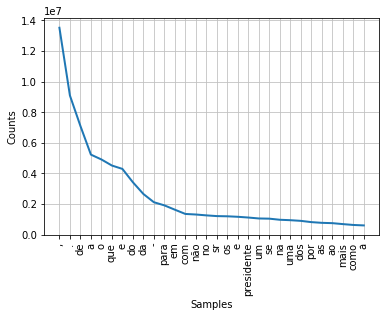

In [23]:
fdist.plot(30)

In [24]:
fdist.N()

182039023

In [25]:
fdist.B()

274422

In [26]:
fdist.freq('presidente')

0.006150840526099726

In [9]:
# n-grams
# collocations: is an expression consisting of two or more words that 
#               correspond to some conventional way of saying things
# http://www.nltk.org/api/nltk.html?highlight=freqdist
# http://www.nltk.org/howto/collocations.html

from nltk.collocations import *

In [69]:
# bigrama
finder = BigramCollocationFinder.from_words(word.lower() for word in tokens)

In [70]:
# lista de stop words
ignored_words = nltk.corpus.stopwords.words('portuguese')
ignored_words = ignored_words + [',', ';', '.', '!', '?', '.)', '-', ')', '(', '{', '}'] 
ignored_words[-12:-1]

['teriam', ',', ';', '.', '!', '?', '.)', '-', ')', '(', '{']

In [71]:
# retira as stop words
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)

In [72]:
# estima a frequência dos bigramas
bigram_measures = nltk.collocations.BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [73]:
len(scored)

4056176

In [76]:
scored[0:5]

[(('nesta', 'casa'), 0.0003687390193147582),
 (('governo', 'federal'), 0.0003573395312322813),
 (('medida', 'provisória'), 0.00034252719743422145),
 (('desta', 'casa'), 0.00033300039905209),
 (('presidente', 'lula'), 0.000302418967870747)]

In [43]:
import pandas as pd

In [58]:
df = pd.DataFrame()
for bigrama in scored:
    df = df.append(pd.Series({'p1': bigrama[0][0],'p2': bigrama[0][1], 'freq': bigrama[1]}),ignore_index = True)
df
df.to_csv('bigramas.csv', sep=';', index=False)

KeyboardInterrupt: 

In [77]:
# trigrama
finder = TrigramCollocationFinder.from_words(word.lower() for word in tokens)

In [78]:
# retira as stop words
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)

In [79]:
# estima a frequência dos trigramas
trigram_measures = nltk.collocations.TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)

In [80]:
len(scored)

3279917

In [81]:
scored[0:5]

[(('supremo', 'tribunal', 'federal'), 9.105005655231199e-05),
 (('henrique', 'eduardo', 'alves'), 6.993708451009906e-05),
 (('fernando', 'henrique', 'cardoso'), 5.5498121867248284e-05),
 (('luiz', 'inácio', 'lula'), 5.474554563253e-05),
 (('pronunciamento', 'encaminhado', 'mesa'), 4.399362314736879e-05)]

In [82]:
df = pd.DataFrame()
for trigrama in scored:
    df = df.append(pd.Series({'p1': trigrama[0][0], 'p2': trigrama[0][1], 'p3': trigrama[0][2], 'freq': trigrama[1]}),ignore_index = True)
df
df.to_csv('trigramas.csv', sep=';', index=False)

KeyboardInterrupt: 

In [27]:
# http://curriculum.dhbridge.org/modules/module13.html
text = nltk.Text(tokens)

In [28]:
text[1:10]

['SR', '.', 'PRESIDENTE', '(', 'Nilton', 'Capixaba', ')', '-', 'Está']

In [29]:
text.concordance('biomédica')

Displaying 25 of 48 matches:
 é a maior instituição de pesquisa biomédica da América Latina . Nos primórdios
quela cidade um pólo de tecnologia biomédica e um importante centro de produção
pesquisadora há 40 anos na área de Biomédica , professora , livre - docente de 
ido Pinto foi mestre em Engenharia Biomédica e fundador da Sociedade Brasileira
Sociedade Brasileira de Engenharia Biomédica , da Sociedade Brasileira de Infor
ou a se especializar em Engenharia Biomédica e o transformou em respeitado prof
or um excelente centro de pesquisa biomédica vinculado à Secretaria da Saúde do
olve estudos na área de biologia e biomédica relacionados diretamente com a saú
ações Internacionais , Informática Biomédica , Nutrição e Metabolismo . Criou -
ada a cabo em nome da investigação biomédica ou da produção de células embrioná
o maior centro de pesquisa na área biomédica da América Latina . Trata - se , c
 Sra . Luciana Alves de Oliveira , biomédica e professora da Universidade Feder
ice Oliveir

In [48]:
text.concordance('UnB')

Displaying 25 of 1141 matches:
sperado . Vejamos agora a situação da UnB , solitária escola pública de ensino 
e V .Exa. Na condição de professor da UnB , embora compulsoriamente licenciado 
 educação brasileira do século XX , a UNB deveria ser um centro de excelência u
orme disse o Professor de História da UnB , especialista em , Wolfgang D , o at
borrascas ideológicas que sacudiram a UnB no final dos anos 70 e no decorrer do
nse de domingo passado , sob o título UnB mergulha na pior crise da sua históri
istovam não tivesse sido professor da UnB . Tal comportamento mostra uma visão 
m recrutar os melhores quadros para a UnB , independentemente de suas convicçõe
e , do Oiapoque ao Chuí , o modelo da UnB . Ora , os nossos escassos recursos f
esabafo de Darcy Ribeiro , criador da UnB , que o jornal cita com muita proprie
iversidade de Brasília . Fui aluna da UnB . Formei -me em Medicina em 1974 , e 
inistério da Educação que olhe para a UnB como um celeiro de pessoas que ali se
 Ministér

In [34]:
# https://rstudio-pubs-static.s3.amazonaws.com/97147_0ea92e526f73436cbc1817dce70b354b.html
# http://vknight.org/unpeudemath/code/2015/06/14/natural-language-and-predicting-funny.html
# http://web.media.mit.edu/~havasi/MAS.S60/assignment1.html
# http://nltk.sourceforge.net/doc/pt-br/tokenize.html

In [ ]:
# https://github.com/fmaruki/Nltk-Tagger-Portuguese
# analise morfológica
nltk.pos_tag(text)

In [ ]:
# classificador
# https://pythonspot.com/en/natural-language-processing-prediction/